<a href="https://colab.research.google.com/github/minhcong00/AI/blob/main/BT_AI_W9_mnist_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
from keras.datasets import mnist
(train_images, train_labels),(test_images, test_labels)=mnist.load_data()

In [49]:
train_images.shape,test_images.shape,train_labels.shape,test_labels.shape

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

so nay la 2


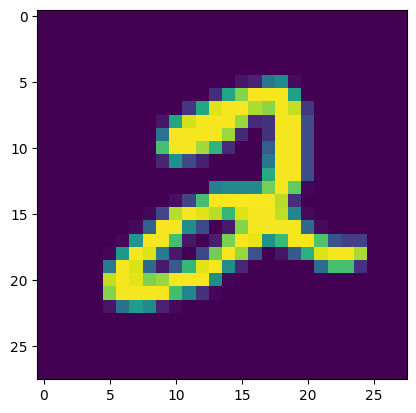

In [50]:
digit = train_images[5]
import matplotlib.pyplot as plt
plt.imshow(digit)
plt.show
print('so nay la', train_labels[5])

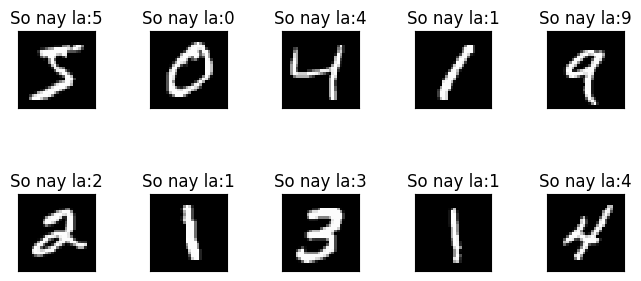

In [51]:
for i in range(10):
  plt.subplot(3,5,i+1)
  plt.tight_layout()
  plt.imshow(train_images[i], cmap = 'gray', interpolation= 'none')
  plt.title('So nay la:{}'.format(train_labels[i]))
  plt.xticks([])
  plt.yticks([])

In [52]:
from keras.models import Sequential
from keras.layers import Dense

model=Sequential()
model.add(Dense(512,activation='relu', input_shape = (28*28,)))
model.add(Dense(10, activation = 'softmax'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 512)               401920    
                                                                 
 dense_7 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [53]:
train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype('float32')/255
test_images = test_images.reshape((10000, 28*28))
test_images = test_images.astype('float32')/255

In [54]:
train_images.shape, test_images.shape

((60000, 784), (10000, 784))

In [55]:
from keras.utils import to_categorical 
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)

In [56]:
train_labels.shape, test_labels.shape

((60000, 10), (10000, 10))

In [57]:
model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.fit(train_images, train_labels, epochs= 20, batch_size= 128)
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Do chinh xac ', test_acc)
print('Do mat mat ', test_loss)

Epoch 1/20
469/469 [==============================] - 6s 12ms/step - loss: 0.2636 - accuracy: 0.9238
Epoch 2/20
469/469 [==============================] - 4s 10ms/step - loss: 0.1073 - accuracy: 0.9687
Epoch 3/20
469/469 [==============================] - 6s 13ms/step - loss: 0.0705 - accuracy: 0.9785
Epoch 4/20
469/469 [==============================] - 5s 10ms/step - loss: 0.0512 - accuracy: 0.9840
Epoch 5/20
469/469 [==============================] - 5s 11ms/step - loss: 0.0378 - accuracy: 0.9888
Epoch 6/20
469/469 [==============================] - 5s 11ms/step - loss: 0.0290 - accuracy: 0.9917
Epoch 7/20
469/469 [==============================] - 5s 10ms/step - loss: 0.0220 - accuracy: 0.9937
Epoch 8/20
469/469 [==============================] - 6s 12ms/step - loss: 0.0165 - accuracy: 0.9953
Epoch 9/20
469/469 [==============================] - 4s 10ms/step - loss: 0.0121 - accuracy: 0.9971
Epoch 10/20
469/469 [==============================] - 5s 10ms/step - loss: 0.0087 - accura

In [58]:
from keras.saving.saving_api import load_model
model.save('test1.h5')

In [59]:
model10=load_model('test1.h5')

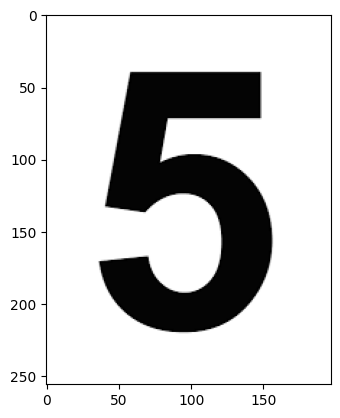

In [63]:
from keras.utils import load_img
url = '/content/so5.png'
img = load_img(url)
plt.imshow(img)

1/1 [==============================] - 0s 26ms/step
So nay la:  5


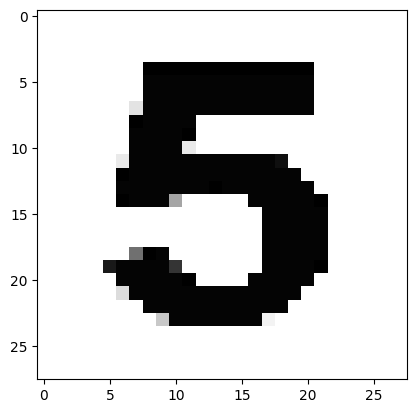

In [64]:
from keras.utils import load_img, img_to_array
import numpy as np
img = load_img(url, target_size = (28,28), color_mode = "grayscale")
plt.imshow(img, cmap='gray')
img = img_to_array(img)
img = img.reshape(1,28*28)
img = img.astype('float32')
img = img/255   
predict_num = np.argmax(model.predict(img))
print("So nay la: ",   predict_num)